In [2]:
import os
import sys
import glob
import random
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm

from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

fast_ai_dir = '/media/rene/Data/fastai/'
sys.path.append(fast_ai_dir)

SEED = 101
np.random.seed(SEED)
from torchvision import datasets, models, transforms

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Add the src directory for functions
src_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'src')
print(src_dir)
sys.path.append(src_dir)

# import my functions:
from genetic import*

/media/rene/Data/learn-lr/src


In [19]:
# loc = '/media/rene/Data/data/learn-lr/output/cifar_dark_10epoch_ds2/cifar_darknet_on_gen_62'
loc = '/media/rene/Data/data/learn-lr/output/cifar_dark_10epoch_ds2_more_var/cifar_darknet_on_gen_29'

data = pickle.load( open( loc, "rb" ) )

## Get best model per epoch

In [20]:
best_schedules = []

for gen_data in data: # list of the generations. Includes all schedules
    best_perf = max(gen_data, key=lambda x: x[0])
    best_schedules.append(best_perf)

In [21]:
acc_list = [sch[0] for sch in best_schedules]
lr_list = [sch[1] for sch in best_schedules]
mom_list = [sch[2] for sch in best_schedules]

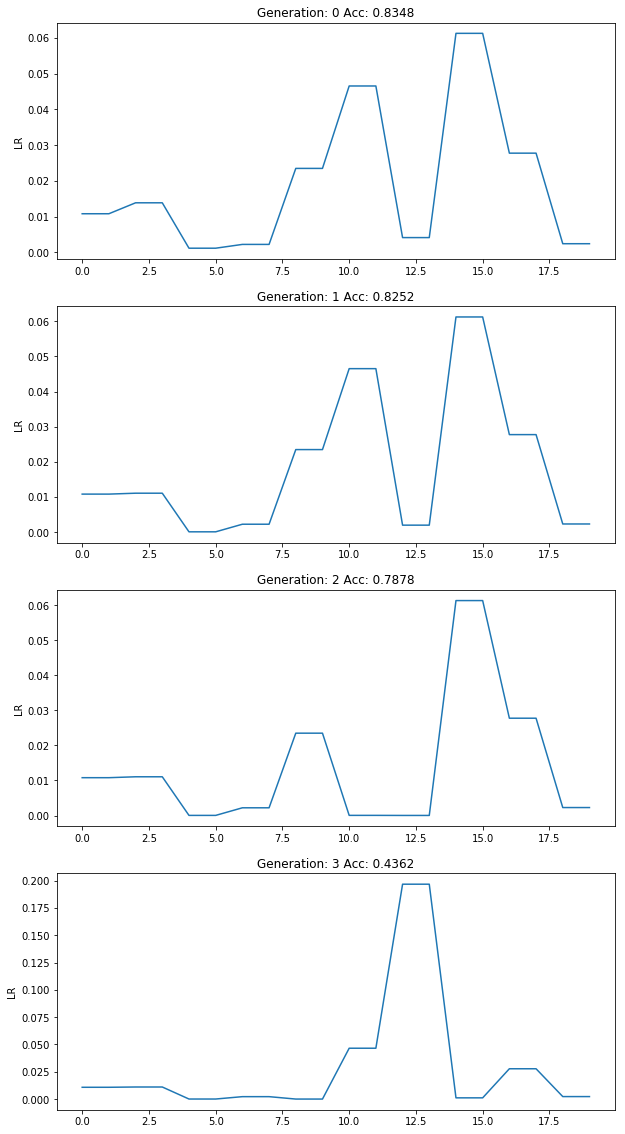

In [22]:
nrow = 4
ncol = 1
skip_factor = 1

fig, axs = plt.subplots(nrow, ncol, figsize=(10,20))
for i, ax in enumerate(fig.axes):
#     print(len(best_schedules[int(i*5)][1]))
#     print(best_schedules[int(i*5)][1])
    ax.plot(list(range(len(best_schedules[int(i*skip_factor)][1]))), best_schedules[int(i*skip_factor)][1])
    ax.set_title('Generation: '+ str(i*skip_factor) + ' Acc: '+ str(best_schedules[int(i*skip_factor)][0]))
    ax.set_ylabel('LR')

## Look at diversity of Schedules in last generation

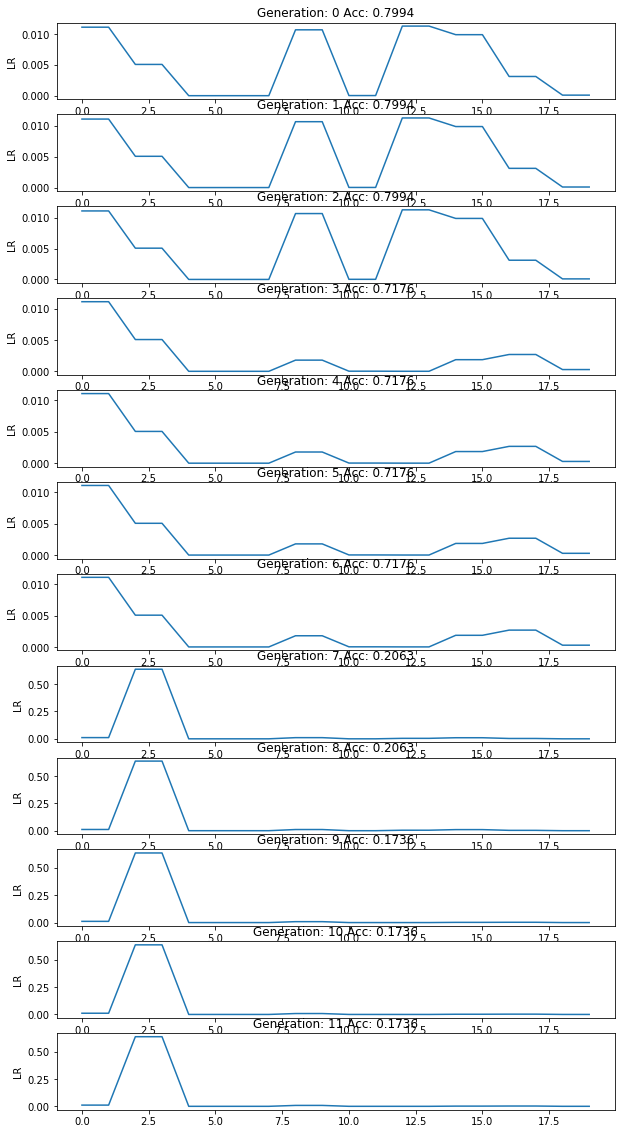

In [23]:
nrow = 12
ncol = 1
skip_factor = 1

gen = 28
last_gen = data[gen]

fig, axs = plt.subplots(nrow, ncol, figsize=(10,20))
for i, ax in enumerate(fig.axes):
    ax.plot(list(range(len(last_gen[int(i*skip_factor)][1]))), last_gen[int(i*skip_factor)][1])
    ax.set_title('Generation: '+ str(i*skip_factor) + ' Acc: '+ str(last_gen[int(i*skip_factor)][0]))
    ax.set_ylabel('LR')

In [12]:
nrow = 10
ncol = 1
skip_factor = 1

gen = 28
last_gen = data[gen]

fig, axs = plt.subplots(nrow, ncol, figsize=(10,20))
for i, ax in enumerate(fig.axes):
    ax.plot(list(range(len(last_gen[int(i*skip_factor)][1]))), last_gen[int(i*skip_factor)][1])
    ax.set_title('Generation: '+ str(i*skip_factor) + ' Acc: '+ str(last_gen[int(i*skip_factor)][0]))
    ax.set_ylabel('LR')

IndexError: list index out of range